<a href="https://colab.research.google.com/github/jrgosalvez/data255_DL/blob/main/Lab1%5CPart_2_DL_255_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SJSU MSDS 255 DL, Spring 2024
#### Lab 1 - Part 2; Team 9

## Image Classification with DL

# Step 1

#### Load dataset from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jorgegosalvez","key":"b878e2c8c62c3e1bb3ff187def4312c4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Source: https://www.kaggle.com/datasets/mdwaquarazam/microorganism-image-classification

Under Settings > select 'Copy API Command'

In [4]:
!kaggle datasets download -d mdwaquarazam/microorganism-image-classification

microorganism-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip microorganism-image-classification.zip -d microorganism-image-classification

Archive:  microorganism-image-classification.zip
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_1.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_10.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_11.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_14.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_16.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_17.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_19.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_2.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_20.png  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_21.jpg  
  inflating: microorganism-image-classification/Micro_Organism/Amoeba/Image_22.jpg  
  inflating: micro

# Step 2

### Explanations

**Gradient Descent (GC)** = is a convex (U shape) formed by taking the derivative of the error function. Identifying the slope and contining in slope direction (+ / -) until slope equals 0 to find the local minima of the derivative of the loss function finds the optimal weight to minimize loss.

Gradient Desent uses ALL data points at a time (when b=N) where as Stochastic Gradient Descent (SGD) is where b=1 or one random data point at a time. Mini-batch Gradient Desent is when the number of data points (b) is greater than 1, but less than N or all data points.

**Drop out** = using dropout as part of a neural network architecture assigns random connection drop outs based on a defined percent to drop out. By dropping out a percent of random connections in the network, it improves the resiliency of the network because the network has to find alterntive avenues to generate outcomes that mitigate loss. The drop out technique prevents overfitting and is only used on training datasets, never for test or inference.

**Activation Functions** = are the heart of hidden layers. They get a single number and output a single number (scalar in / scalar out). Because not all neural networks are linear, activation functions afford non-linear activation, if they do not non-linear activation functions would simply reduce to linear regression. Six activation functions are popular, Sigmoid, tanh, ReLU, Leaky ReLU, Maxout, and ELU. Of these ReLu is a good default choice. Which activation fucntion to use depends on on the output variable which also affects which loss function to use. Include is a simple table outling what output layer (activation and loss function) to use.

**Output Variable | Output Layer | Loss Function**

* Single number   | Linear       | MSE

* Single probability    | Sigmoid      | Binary cross-entropy

* Vector of n numbers   | Stack of linear functions       | MSE

* Vector of n probabilities   | Softmax       | Categorical cross-entropy


**Back Propagation** = exploits the layer-by-layer architecture of neural networks as an efficient method to compute the gradient of the loss function. This is accomplished by organizing in the form of computational graph that affords incremental calcuation of the gradient one layer at a time using matrix multiplications (perfect for GPUs). In calculating the gradient of a layer to optimize the loss function by adjusting weights across the network. Back prop allows the neural network to iterate forwards and backwards in a repetative pattern adjusting weights based on the gradient of the error fucntion (weights) calculated by taking the partial derivatives and applying the 'chain rule' across the network in an interative fashion until the loss is close to zero. When this happens the network is said to have converged (zero/inconsiquential gains to make additional moves).

**Epochs, Iterations, and Batch Size**


* **Epochs** = one complete pass of an entire training dataset exactly once to update weights.
* **Batch Size** = number of training examples in one iteration. Batch size breaks up the dataset into bite-size chunks.
* **Iterations** = one update of a models weights based on one batch of training data. Iterations are calculated based on the dataset size (number of samples) divided by the batch size. For example, if we have 1,000 images and a batch size of 50, than the number of iterations per epoch is 20.




# Step 3

### Visualize and Summarize Data

In [5]:
import os

def count_folders_and_objects(directory):
    folders_count = 0
    objects_count = 0

    for root, dirs, files in os.walk(directory):
        folders_count += len(dirs)
        objects_count += len(files)

    return folders_count, objects_count

directory_path = '/content/microorganism-image-classification/Micro_Organism'
folders, objects = count_folders_and_objects(directory_path)
print("Number of folders:", folders)
print("Number of objects:", objects)

Number of folders: 8
Number of objects: 789


In [6]:
# Num entities in train and test sets


# Num classes in target variable


In [7]:
from PIL import Image

# Num pixels in the image (HxW)
img = Image.open('/content/microorganism-image-classification/Micro_Organism/Amoeba/Image_10.jpg')
img.size

(720, 405)

In [8]:
# Iterate across all data objects to ensure all same size

def get_image_size(folder_path):
  """
  This function iterates through all files in a folder and its subfolders,
  checks if the file is an image, and prints its size if it is.
  """
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        with Image.open(file_path) as img:
          width, height = img.size
          print(f"{file_path}: ({width}, {height})")
      except IOError:
        # Ignore non-image files
        pass

# call function
get_image_size(directory_path)

/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_176.jpg: (4681, 4701)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_30.jpg: (480, 360)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_16.jpg: (1280, 720)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_144.jpg: (600, 800)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_173.jpg: (1000, 1000)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_98.jpg: (1280, 720)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_63.jpeg: (1600, 1200)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_191.jpg: (829, 770)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_148.jpg: (1024, 1024)
/content/microorganism-image-classification/Micro_Organism/Paramecium/Image_133.jpg: (1000, 674)
/content/microorganism-image-cla

Class name: Paramecium has 152 images


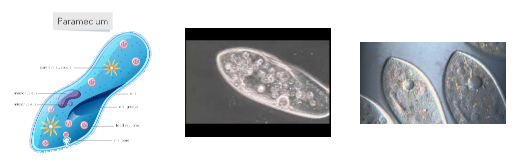


Class name: Spiral_bacteria has 75 images


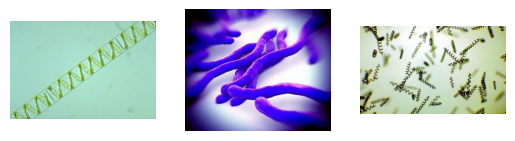


Class name: Amoeba has 72 images


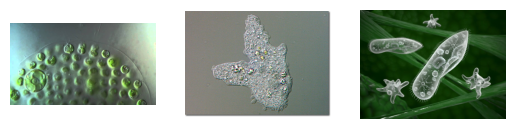


Class name: Hydra has 76 images


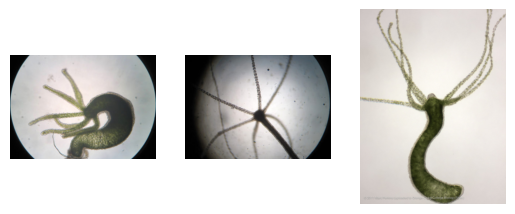


Class name: Euglena has 168 images


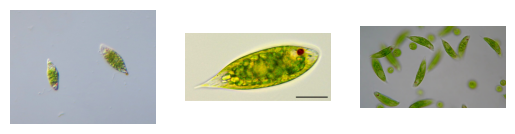


Class name: Yeast has 75 images


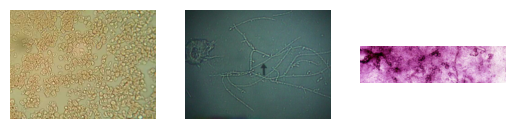


Class name: Rod_bacteria has 85 images


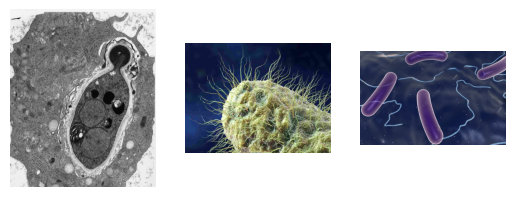


Class name: Spherical_bacteria has 86 images


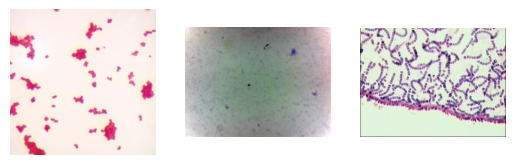

In [9]:
# Classes, number of images per class, and 3 images per class visualized

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def count_objects_in_folders(directory):
    folders_and_objects_count = {}

    for root, dirs, files in os.walk(directory):
        folder_name = os.path.relpath(root, directory)
        objects_count = len(files)
        folders_and_objects_count[folder_name] = objects_count

        # Display up to three images from the current folder
        if objects_count >= 3:
            images = [f for f in files if f.endswith('.jpg') or f.endswith('.png')][:3]  # Assuming images are JPEG or PNG
            img_paths = [os.path.join(root, img) for img in images]
            print(f'Class name: {folder_name} has {objects_count} images')
            display_images_side_by_side(img_paths)
            print()

    return folders_and_objects_count

def display_images_side_by_side(img_paths):
    fig, axs = plt.subplots(1, len(img_paths))
    for i, img_path in enumerate(img_paths):
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

# call function
folders_and_objects = count_objects_in_folders(directory_path)

# Step 4

### Train NN

In [ ]:
# Num layers and neurons in each layer


In [ ]:
# Try diff activation functions and explain why


In [ ]:
# Try dropout


In [ ]:
# Try different regularizations (not dropout


In [ ]:
# Try differnt optimiation algos (SGC, Adam, Tahan, etc.)


In [ ]:
# Graph f1 score vs epoch for training and validation


In [ ]:
# Calc num parameters (based on layers, neurons, nodes)
